# Trigonometric Fourier Series



Any periodic waveform can be approximated by a DC component (which may be 0) and the sum of the fundamental and harmomic sinusoidal waveforms. This has important applications in many applications of electronics but is particularly crucial for signal processing and communications.

## Colophon

An annotatable worksheet for this presentation is available as [**Worksheet 9**](https://cpjobling.github.io/eg-247-textbook/fourier_series/1/worksheet9.html).

* The source code for this page is [fourier_series/1/trig_fseries.md](https://github.com/cpjobling/eg-247-textbook/blob/master/fourier_series/1/trig_fseries.md).

* You can view the notes for this presentation as a webpage ([HTML](https://cpjobling.github.io/eg-247-textbook/fourier_series/1/trig_fseries.html)). 

* This page is downloadable as a [PDF](https://cpjobling.github.io/eg-247-textbook/fourier_series/1/trig_fseries.pdf) file.

## Revision?

I believe that this subject has been covered in EG-150 Signals and Systems and so we present the notes as background for the Fourier transform.

## Agenda

* Motivating examples

* Wave analysis and the Trig. Fourier Series

* Symmetry in Trigonometric Fourier Series

* Computing coefficients of Trig. Fourier Series in MATLAB

* Gibbs Phenomenon

## Motivating Examples

This [Fourier Series demo](http://dspfirst.gatech.edu/matlab/#fseriesdemo), developed by Members of the Center for Signal and Image Processing (CSIP) at the [School of Electrical and Computer Engineering](https://www.ece.gatech.edu/) at the [Georgia Institute of Technology](https://www.gatech.edu/), shows how periodic signals can be synthesised by a sum of sinusoidal signals.

It is here used as a motivational example in our introduction to [Fourier Series](https://en.wikipedia.org/wiki/Fourier_series). (See also [Fourier Series](https://mathworld.wolfram.com/FourierSeries.html) from Wolfram MathWorld referenced in the **Quick Reference** on Blackboard.)

To install this example, download the [zip file](http://dspfirst.gatech.edu/matlab/ZipFiles/fseriesdemo-v144.zip) and unpack it somewhere on your MATLAB path.

## Wave Analysis

* [Jean Baptiste Joseph Fourier](https://en.wikipedia.org/wiki/Joseph_Fourier) (21 March 1768 – 16 May 1830) discovered that any _**periodic**_ signal could be represented as a series of *harmonically related* sinusoids.

* An *harmonic* is a frequency whose value is an integer multiple of some *fundamental frequency*

* For example, the frequencies 2 MHz, 3 Mhz, 4 MHz are the second, third and fourth harmonics of a sinusoid with fundamental frequency 1 Mhz.

### The Trigonometric Fourier Series

Any periodic waveform $f(t)$ can be represented as

$$
\begin{eqnarray*}
  f(t) &=& \frac{1}{2}{a_0} + {a_1}\cos \Omega_0 t + {a_2}\cos 2\Omega_0 t + {a_3}\cos 3\Omega_0 t +  \cdots  + {a_n}\cos n\Omega_0 t +  \cdots  \\ 
   &+& {b_1}\sin \Omega_0 t + {b_2}\sin 2\Omega_0 t + {b_3}\sin 3\Omega_0 t +  \cdots  + {b_n}\sin n\Omega_0 t +  \cdots  \\ 
\end{eqnarray*}
$$

or equivalently (if more confusingly)

$$
f(t) = \frac{1}{2}{a_0} + \sum\limits_{n = 1}^\infty  {({a_n}\cos n\Omega_0 t + {b_n}\sin n\Omega_0 t)}
$$

where $\Omega_0$ rad/s is the *fundamental frequency*.

### Notation

* The first term $a_o/2$ is a constant and represents the DC (average) component of the signal $f(t)$
* The terms with coefficients $a_1$ and $b_1$ together represent the fundamental frequency component of $f(t)$ at frequency $\Omega_0$.
* The terms with coefficients $a_2$ and $b_2$ together represent the second harmonic frequency component of $f(t)$ at frequency $2\Omega_0$.

And so on.

Since any periodic function $f(t)$ can be expressed as a Fourier series, it follows that the sum of the DC, fundamental, second harmonic and so on must produce the waveform $f(t)$.

### Sums of sinusoids

In general, the sum of two or more sinusoids does not produce a sinusoid as shown below.

<img src="pictures/7_1.png">

To generate this picture use [fourier_series1.m](https://cpjobling.github.io/eg-247-textbook/fourier_series/matlab/fourier_series1.m).

### Evaluation of the Fourier series coefficients

The coefficients are obtained from the following expressions (valid for any periodic waveform with fundamental frequency $\Omega_0$ so long as we integrate over one period $0\to T_0$ where $T_0 = 2\pi/\Omega_0$), and $\theta = \Omega_0 t$:

$$\frac{1}{2}a_0 = \frac{1}{T_0}\int_{0}^{T_0}f(t)d t = \frac{1}{\pi}\int_{0}^{2\pi}f(\theta )d \theta$$

$$a_n = \frac{1}{T_0}\int_{0}^{T_0}f(t)\cos n\Omega_0 t\,dt = \frac{1}{2\pi}\int_{0}^{2\pi}f(\theta)\cos n\theta\,d\theta$$

$$b_n = \frac{1}{T_0}\int_{0}^{T_0}f(t)\sin n\Omega_0 t\,dt = \frac{1}{2\pi}\int_{0}^{2\pi}f(\theta)\cos n\theta \,d\theta$$

## Odd, Even and Half-wave Symmetry

### Odd and even symmetry

* An *odd* function is one for which $f(t) = -f(-t)$. The function $\sin t$ is an *odd* function.
* An *even* function is one for which $f(t) = f(-t)$. The function $\cos t$ is an *even* function.

### Half-wave symmetry

* A periodic function with period $T$ is a function for which $f(t) = f(t + T)$
* A periodic function with period $T$, has *half-wave symmetry* if $f(t) = -f(t + T/2)$

## Symmetry in Trigonometric Fourier Series

There are simplifications we can make if the original periodic properties has certain properties:

* If $f(t)$ is odd, $a_0=0$ and there will be no cosine terms so ${a_n} = 0\; \forall n > 0$
* If $f(t)$ is even, there will be no sine terms and ${b_n} = 0\; \forall n > 0$. The DC may or may not be zero.
* If $f(t)$ has *half-wave symmetry* only the odd harmonics will be present. That is $a_n$ and $b_n$ is zero for all even values of $n$ (0, 2, 4, ...)

### Symmetry in Common Waveforms

To reproduce the following waveforms (without annotation) publish the script [waves.m](https://cpjobling.github.io/eg-247-textbook/fourier_series/matlab/waves.m).

#### Squarewave

<img src="pictures/square.png">

* Average value over period $T$ is ...?
* It is an **odd**/**even**function?
* It **has/has not** half-wave symmetry $f(t)=-f(t+T/2)$?

#### Shifted Squarewave

<img src="pictures/shifted_sq.png">

* Average value over period $T$ is ...?
* It is an **odd**/**even** function?
* It **has/has not** half-wave symmetry $f(t)=-f(t+T/2)$?

#### Sawtooth

<img src="pictures/sawtooth.png">

* Average value over period $T$ is ...?
* It is an **odd**/**even** function?
* It **has/has not** half-wave symmetry $f(t)=-f(t+T/2)$?

#### Triangle

<img src="pictures/triangle.png">

* Average value over period $T$ is ...?
* It is an **odd**/**even**function?
* It **has/has not** half-wave symmetry $f(t)=-f(t+T/2)$?

### Symmetry in fundamental, Second and Third Harmonics

In the following, $T/2$ is taken to be the half-period of the fundamental sinewave.

#### Fundamental

<img src="pictures/fundamental.png">


* Average value over period $T$ is ...?
* It is an **odd**/**even**function?
* It **has/has not** half-wave symmetry $f(t)=-f(t+T/2)$?

#### Second Harmonic

<img src="pictures/2nd_harm.png">


* Average value over period $T$ is ...?
* It is an **odd**/**even** function?
* It **has/has not** half-wave symmetry $f(t)=-f(t+T/2)$?

#### Third Harmonic

<img src="pictures/3rd_harm.png">

* Average value over period $T$ is ...?
* It is an **odd**/**even** function?
* It **has/has not** half-wave symmetry $f(t)=-f(t+T/2)$?

### Some simplifications that result from symmetry

* The limits of the integrals used to compute the coefficents $a_n$ and $b_n$ of the Fourier series are given as $0\to 2\pi$ which is one period $T$
* We could also choose to integrate from $-\pi \to \pi$
* If the function is *odd*, or *even* or has *half-wave symmetry* we can compute $a_n$ and $b_n$ by integrating from $0\to \pi$ and multiplying by 2.
* If we have *half-wave symmetry* we can compute $a_n$ and $b_n$ by integrating from $0\to \pi/2$ and multiplying by 4.

(For more details see page 7-10 of Karris)

## Computing coefficients of Trig. Fourier Series in MATLAB 

As an example let's take a square wave with amplitude $\pm A$ and period $T$.

<img src="pictures/square_wave.png">

### Solution

In [1]:
clear all
cd ../matlab
format compact
imatlab_export_fig('print-svg')  % Static svg figures.

Error using eval
Undefined function 'imatlab_export_fig' for input arguments of type 'char'.


In [2]:
syms t n A pi
n = [1:11];

DC component

In [3]:
half_a0 = 1/(2*pi)*(int(A,t,0,pi)+int(-A,t,pi,2*pi))

half_a0 =


0


Compute harmonics

In [4]:
ai = 1/pi*(int(A*cos(n*t),t,0,pi)+int(-A*cos(n*t),t,pi,2*pi));
bi = 1/pi*(int(A*sin(n*t),t,0,pi)+int(-A*sin(n*t),t,pi,2*pi));

Reconstruct $f(t)$ from harmonic sine functions

In [5]:
ft = half_a0;
for k=1:length(n)
    ft = ft + ai(k)*cos(k*t) + bi(k)*sin(k*t);
end;

Make numeric

In [6]:
ft_num = subs(ft,A,1.0);

Print using 4 sig digits

In [7]:
ft_num = vpa(ft_num, 4)

ft_num =


(cos(9*t)*(0.2222*sin(9*pi) - 0.1111*sin(18*pi)))/pi + (cos(5*t)*(0.4000*sin(5*pi) - 0.2000*sin(10*pi)))/pi + (cos(10*t)*(0.2000*sin(10*pi) - 0.1000*sin(20*pi)))/pi + (cos(11*t)*(0.1818*sin(11*pi) - 0.0909*sin(22*pi)))/pi + (cos(3*t)*(0.6667*sin(3*pi) - 0.3333*sin(6*pi)))/pi + (cos(6*t)*(0.3333*sin(6*pi) - 0.1667*sin(12*pi)))/pi + (sin(5*t)*(0.2000*cos(10*pi) - 0.2000*cos(5*pi) + 0.4000*sin(2.5000*pi)^2))/pi + (sin(10*t)*(0.1000*cos(20*pi) - 0.1000*cos(10*pi) + 0.2000*sin(5*pi)^2))/pi + (sin(9*t)*(0.1111*cos(18*pi) - 0.1111*cos(9*pi) + 0.2222*sin(4.5000*pi)^2))/pi + (sin(11*t)*(0.0909*cos(22*pi) - 0.0909*cos(11*pi) + 0.1818*sin(5.5000*pi)^2))/pi + (cos(7*t)*(0.2857*sin(7*pi) - 0.1429*sin(14*pi)))/pi + (sin(3*t)*(0.3333*cos(6*pi) - 0.3333*cos(3*pi) + 0.6667*sin(1.5000*pi)^2))/pi + (sin(6*t)*(0.1667*cos(12*pi) - 0.1667*cos(6*pi) + 0.3333*sin(3*pi)^2))/pi + (sin(7*t)*(0.1429*cos(14*pi) - 0.1429*cos(7*pi) + 0.2857*sin(3.5000*pi)^2))/pi + (sin(2*t)*(sin(pi)^2*(4*sin(pi)^2 - 3) + sin(pi)^2))

cos(8*pi) - 0.2500*cos(4*pi) + 0.5000*sin(2*pi)^2))/pi + (sin(8*t)*(0.1250*cos(16*pi) - 0.1250*cos(8*pi) + 0.2500*sin(4*pi)^2))/pi + (cos(2*t)*(0.5000*sin(2*pi) + 0.5000*sin(2*pi)*(4*sin(pi)^2 - 1)))/pi + (cos(4*t)*(0.5000*sin(4*pi) - 0.2500*sin(8*pi)))/pi + (cos(8*t)*(0.2500*sin(8*pi) - 0.1250*sin(16*pi)))/pi + (cos(t)*(sin(pi) - 1*sin(pi)*(2*cos(pi) - 1)))/pi + (sin(t)*((2*cos(pi) + 1)*(cos(pi) - 1) - 1*cos(pi) + 1))/pi


Plot result

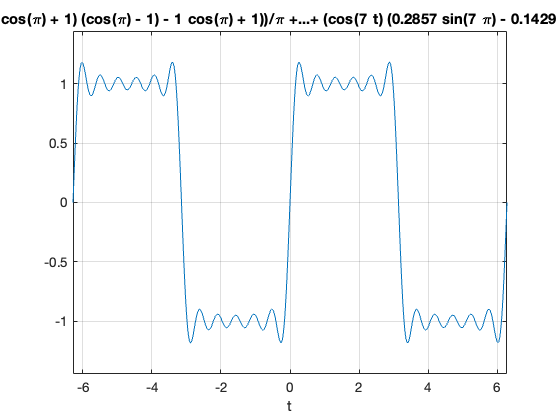

In [8]:
ezplot(ft_num),grid

Plot original signal (we could use `heaviside` for this as well)

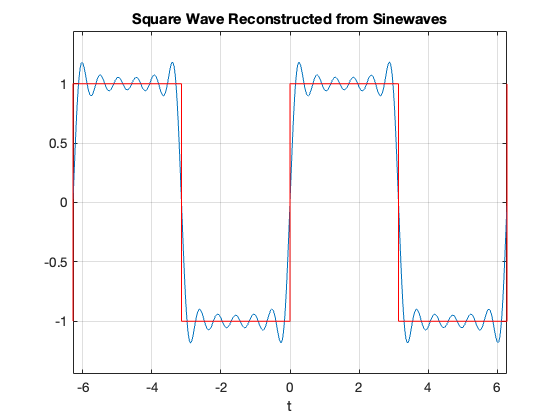

In [9]:
ezplot(ft_num)
hold on
clear pi
t = [-3,-2,-2,-2,-1,-1,-1,0,0,0,1,1,1,2,2,2,3]*pi;
f = [-1,-1,0,1,1,0,-1,-1,0,1,1,0,-1,-1,0,1,1];
plot(t,f,'r-')
grid
title('Square Wave Reconstructed from Sinewaves')
hold off

To run the full solution yourself download and run [square_ftrig.mlx](https://cpjobling.github.io/eg-247-textbook/fourier_series/matlab/square_ftrig.mlx).

The Result confirms that:

* $a_0 = 0$
* $a_i = 0$: function is odd
* $b_i = 0$: for $i$ even - half-wave symmetry

```
ft =
 
(4*A*sin(t))/pi + (4*A*sin(3*t))/(3*pi) + (4*A*sin(5*t))/(5*pi) + (4*A*sin(7*t))/(7*pi) + (4*A*sin(9*t))/(9*pi) + (4*A*sin(11*t))/(11*pi)
```

Note that the coefficients match those given in the textbook (Section 7.4.1).

$$f(t) = \frac{4A}{\pi}\left(\sin \Omega_0 t + \frac{1}{3}\sin 3\Omega_0 t + \frac{1}{5}\sin 5\Omega_0 t + \cdots\right) = \frac{4A}{\pi}\sum_{n=\mathrm{odd}}\frac{1}{n}\sin n\Omega_0 t$$

### Using symmetry - computing the Fourier series coefficients of the shifted square wave

<img src="pictures/shifted_square_wave.png">

Calculation of Fourier coefficients for Shifted Square Wave Exploiting half-wave symmetry. This is almost the same procedure as before. You can confirm the results by downloading and executing this file: [shifted_sq_ftrig.mlx](https://cpjobling.github.io/eg-247-textbook/fourier_series/matlab/shifted_sq_ftrig.mlx).

In [10]:
clear all
syms t n A pi

Define harmonics

In [11]:
n = [1:11];

DC component

In [12]:
half_a0 = 0

half_a0 =
     0


Compute harmonics - use half-wave symmetry

In [13]:
ai = 4/pi*int(A*cos(n*t),t,0,(sym(pi)/2));

In [14]:
bi = zeros(size(n));

Reconstruct f(t) from harmonic sine functions

In [15]:
ft = half_a0;
for k=1:length(n)
    ft = ft + ai(k)*cos(k*t) + bi(k)*sin(k*t);
end

Make numeric and print to 4 sig. figs.

In [16]:
ft_num = subs(ft,A,1.0);
ft_num = vpa(ft_num, 4)

ft_num =


(cos(4*t)*sin(2*pi))/pi + (0.5000*cos(8*t)*sin(4*pi))/pi + (0.4444*cos(9*t)*sin(4.5000*pi))/pi + (0.8000*sin(2.5000*pi)*cos(5*t))/pi + (0.4000*sin(5*pi)*cos(10*t))/pi + (0.3636*sin(5.5000*pi)*cos(11*t))/pi + (1.3333*sin(1.5000*pi)*cos(3*t))/pi + (0.6667*sin(3*pi)*cos(6*t))/pi + (0.5714*sin(3.5000*pi)*cos(7*t))/pi + (4*cos(t)*sin(0.5000*pi))/pi + (2*sin(pi)*cos(2*t))/pi


plot result and overlay original signal (we could use `heaviside` for this as well.

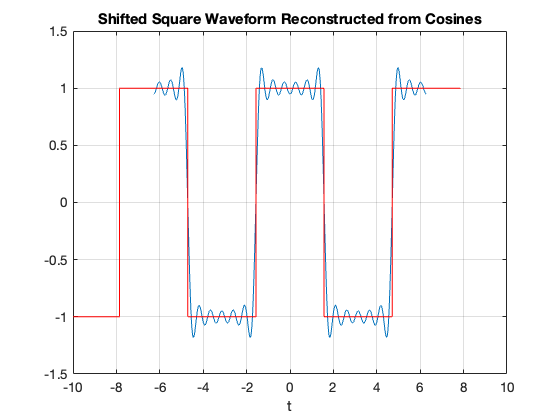

In [17]:
clear pi
ezplot(ft_num)
hold on
t = [-3,-2,-2,-2,-1,-1,-1,0,0,0,1,1,1,2,2,2,3]*pi;
f = [-1,-1,0,1,1,0,-1,-1,0,1,1,0,-1,-1,0,1,1];
plot(t-pi/2,f,'r-')
axis([-10,10,-1.5,1.5])
grid
title('Shifted Square Waveform Reconstructed from Cosines')
hold off

* As before $a_0=0$
* We observe that this function is even, so all $b_k$ coefficents will be zero
* The waveform has half-wave symmetry, so only odd indexed coefficents will be present.
* Further more, because it has half-wave symmetry we can just integrate from $0 \to \pi/2$ and multiply the result by 4.

Note that the coefficients match those given in the textbook (Section 7.4.2).

$$f(t) = \frac{4A}{\pi}\left(\cos \Omega_0 t - \frac{1}{3}\cos 3\Omega_0 t + \frac{1}{5}\cos 5\Omega_0 t - \cdots\right) = \frac{4A}{\pi}\sum_{n=\mathrm{odd}}(-1)^{\frac{n-1}{2}} \frac{1}{n}\cos n\Omega_0 t$$

## Gibbs Phenomenon

In an earlier slide we found that the trigonometric for of the Fourier series of the square waveform is

$$f(t) = \frac{4A}{\pi}\left(\sin \Omega_0 t + \frac{1}{3}\sin 3\Omega_0 t + \frac{1}{5}\sin 5\Omega_0 t + \cdots\right) = \frac{4A}{\pi}\sum_{n=\mathrm{odd}}\frac{1}{n}\sin n\Omega_0 t$$

This figure shows the approximation for the first 11 harmonics:

<img src="pictures/fsq_trig.png">

As we add more harmonics, the sum looks more and more like a square wave. However the crests do not become flattened; this is known as *Gibbs Phenomenon* and it occurs because of the discontinuity of the perfect sqare waveform as it changes from 
$+A$ to $-A$ and *vice versa*.